[Reference](https://blog.stackademic.com/python-trading-guide-macd-b4aa256f9bed)

In [4]:
!pip install yfinance

In [5]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=3be929c286e6f451a766a4e1ada416e8bd0a3d999eec25d67b5d9456f5acd64c
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [6]:
import yfinance as yf
import matplotlib.pyplot as plt
import ta

data = yf.download('TSLA', start='2020-01-01', end='2023-01-01')
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


In [7]:
macd_object = ta.trend.MACD(data['Close'])
data['MACD'] = macd_object.macd()
data['MACD_Signal'] = macd_object.macd_signal()
data['MACD_Diff'] = macd_object.macd_diff()
data.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,MACD_Signal,MACD_Diff
Date,,,,,,,,,
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,-17.244768,-13.664886,-3.579883
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,-19.072995,-14.746507,-4.326487
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,-20.000032,-15.797212,-4.202820
2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,-19.771700,-16.592110,-3.179590
2022-12-30,119.949997,124.480003,119.750000,123.180000,123.180000,157777300,-19.258998,-17.125488,-2.133511


In [8]:
# class ta.trend.MACD(
#   close: pandas.core.series.Series,
#   window_slow: int = 26, window_fast: int = 12,
#   window_sign: int = 9, fillna: bool = False
# )

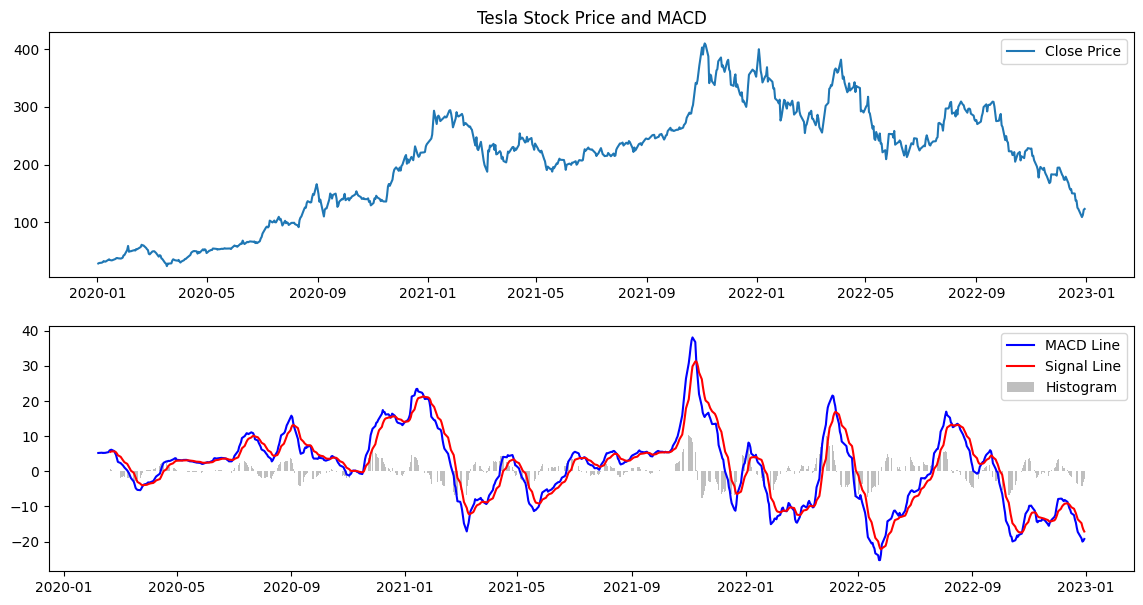

In [9]:
# Plotting
plt.figure(figsize=(14, 7))

# Plotting Close Price
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='Close Price')
plt.title('Tesla Stock Price and MACD')
plt.legend()

# Plotting MACD
plt.subplot(2, 1, 2)
plt.plot(data['MACD'], label='MACD Line', color='blue')
plt.plot(data['MACD_Signal'], label='Signal Line', color='red')
plt.bar(data.index, data['MACD_Diff'], label='Histogram', color='grey', alpha=0.5)
plt.legend()

plt.show()